<a href="https://colab.research.google.com/github/dusanmila/Gan/blob/main/DusanMilasinovicGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uvod
Prikazano je kako trenirati GAN pomoću PyTorch-a za generisanje fotografija pasa.

Generator (mreža) generiše nove instance fotografije, dok ih diskriminator procenjuje na autentičnost.

Sporni trening fokusira se na slabosti sistema, prisiljavajući se da se vremenom poboljšavaju , sve dok lažne fotografije koje generiše ne postanu neprimetne od stvarnih fotografija i diskriminator ih ne može razlikovati .

Diskriminator je samo binarni klasifikator koji kao ulaz dobija dve serije fotografija i utvrđuje da li je fotografija stvarna ili lažna.

Diskriminator optimizuje funkciju gubitka, koja se sastoji od zbira stvarnih i lažnih gubitaka, implementiranih od strane funkcija real_loss() i fake_loss().

Generator optimizuje stvarni gubitak da bi zavarao diskriminator čineći da generisana fotografija sve više liči na stvarne fotografije (počevši od random šuma).

Funkcija build_GAN() je implementirana za kreiranje i inicijalizaciju diskriminatornih i generatorskih mreža.

Generisanje fotografija pomoću GAN-a
Generativna kontradiktorna mreža (GAN) je model mašinskog učenja (ML) u kome se dve neuronske mreže međusobno takmiče kako bi postale tačnije u svojim predviđanjima. GAN-ovi obično rade bez nadzora i koriste kooperativni okvir igara sa nultom sumom za učenje.

Dve neuronske mreže koje čine GAN nazivaju se generatorom i diskriminatorom. Generator je konvoluciona neuronska mreža, a diskriminator je dekonvoluciona neuronska mreža. Cilj generatora je veštačka proizvodnja izlaza koji se lako mogu zameniti sa stvarnim podacima. Cilj diskriminatora je da identifikuje koji su ishodi koje veštački stvaraju.

U osnovi, GAN kreiraju sopstvene podatke o obuci. Kako se petlja povratnih informacija između kontradiktornih mreža nastavlja, generator će početi da proizvodi kvalitetniji izlaz, a diskriminator će postati bolji u obeležavanju podataka koji su veštački stvoreni.

Kako rade GAN-ovi
Prvi korak u uspostavljanju GAN-a je identifikacija željenog krajnjeg rezultata i prikupljanje početnog skupa podataka na osnovu tih parametara. Ovi podaci se zatim randomiziraju i unose u generator dok ne steknu osnovnu tačnost u stvaranju rezultata.

Posle toga, generisane slike se unose u diskriminator zajedno sa stvarnim tačkama podataka iz originalnog koncepta. Diskriminator filtrira informacije i vraća verovatnoću između 0 i 1 da bi prikazao autentičnost svake slike (1 korelira sa stvarnom, a 0 korelira sa lažnom). Zatim se ove vrednosti ručno proveravaju za uspeh i ponavljaju dok se ne postigne željeni ishod.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p" -O images.zip && rm -rf /tmp/cookies.txt



--2022-07-15 11:30:05--  https://docs.google.com/uc?export=download&confirm=t&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p
Resolving docs.google.com (docs.google.com)... 142.251.16.113, 142.251.16.138, 142.251.16.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ciieb64t0v88m00dtlfrnp6crb5c1a18/1657884600000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=3767e8cd-96d5-43c3-8d22-324b018666a8 [following]
--2022-07-15 11:30:05--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ciieb64t0v88m00dtlfrnp6crb5c1a18/1657884600000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=3767e8cd-96d5-43c3-8d22-324b018666a8
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 142.250.188.33, 

In [2]:
!unzip /content/images.zip


Archive:  /content/images.zip
  inflating: Annotation.zip          
  inflating: all-dogs.zip            


In [3]:
!unzip /content/all-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: all-dogs/n02113624_8890.jpg  
  inflating: all-dogs/n02107683_215.jpg  
  inflating: all-dogs/n02093428_5326.jpg  
  inflating: all-dogs/n02105412_8018.jpg  
  inflating: all-dogs/n02093647_3129.jpg  
  inflating: all-dogs/n02088466_8078.jpg  
  inflating: all-dogs/n02108915_4214.jpg  
  inflating: all-dogs/n02089078_2841.jpg  
  inflating: all-dogs/n02105855_3498.jpg  
  inflating: all-dogs/n02094114_2823.jpg  
  inflating: all-dogs/n02088094_649.jpg  
  inflating: all-dogs/n02091831_2232.jpg  
  inflating: all-dogs/n02096585_3105.jpg  
  inflating: all-dogs/n02109961_977.jpg  
  inflating: all-dogs/n02097047_5869.jpg  
  inflating: all-dogs/n02106030_16250.jpg  
  inflating: all-dogs/n02110958_13721.jpg  
  inflating: all-dogs/n02107142_8437.jpg  
  inflating: all-dogs/n02094433_1312.jpg  
  inflating: all-dogs/n02097474_5481.jpg  
  inflating: all-dogs/n02097130_1531.jpg  
  inflating: all-dogs/n02092339_284.jpg  
  inf

In [4]:
!unzip /content/Annotation.zip

Streaming output truncated to the last 5000 lines.
  inflating: Annotation/n02088094-Afghan_hound/n02088094_5285  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_5285  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_4501  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_4501  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_13442  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_13442  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_8764  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_8764  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3982  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3982  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3949  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3949  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_1410  
  inflating: __MACOSX/Annotation/n02088094-Afghan

Numpy
Numpy je Python biblioteka koja nudi višedimenzionalni objekt niza, razne izvedene objekte (kao što su maskirani nizovi i matrice) i asortiman rutina za brze operacije na nizovima, uključujući matematičke, logičke, manipulacije oblicima, sortiranje, odabir, I / O , diskretne Fourierove transformacije, osnovna linearna algebra, osnovne statističke operacije, slučajne simulacije i još mnogo toga.

Os
OS modul u Pithonu pruža funkcije za interakciju sa operativnim sistemom. OS dolazi pod Pithonovim standardnim uslužnim modulima. Ovaj modul pruža prenosni način korišćenja funkcionalnosti zavisne od operativnog sistema. Moduli os i os.path uključuju mnoge funkcije za interakciju sa sistemom datoteka.

Rukovanje trenutnim radnim direktorijumom Smatrajte Current Vorking Directori (CVD) kao fasciklu, u kojoj Pithon radi. Kad god se datoteke nazivaju samo njihovim imenom, Pithon pretpostavlja da počinje u CVD-u, što znači da će referenca samo sa imenom biti uspešna samo ako je datoteka u Pithon-ovom CVD-u. Napomena: Fascikla u kojoj se izvodi Pithon skripta poznata je kao Trenutni direktorijum. Ovo nije putanja na kojoj se nalazi Pithon skripta.

matplotlib.pyplot
matplotlib.piplot je skup funkcija zbog kojih matplotlib radi poput MATLAB-a. Svaka funkcija piplot-a vrši neke promene na slici: npr. Kreira figuru, kreira područje crtanja na slici, iscrtava neke linije u području crtanja, ukrašava ploču oznakama itd.

U matplotlib.piplot različita stanja su sačuvana u pozivima funkcija, tako da prati stvari poput trenutne figure i područja crtanja, a funkcije crtanja usmerene su na trenutne ose (imajte na umu da su „ose“ ovde i na većini mesta u dokumentacija se odnosi na deo ose ose, a ne na strogi matematički pojam za više od jedne ose).

cv2
OpenCV-Pithon je biblioteka Pithon veza koja je dizajnirana za rešavanje problema sa računarskim vidom. cv2.imread () metoda učitava sliku iz navedene datoteke. Ako se slika ne može pročitati (zbog nedostajuće datoteke, nepravilnih dozvola, nepodržanih ili nevaljanih formata), onda ovaj metod vraća praznu matricu.

keras
Keras je, biblioteka neuronskih mreža na visokom nivou koja radi na vrhu TensorFlov-a, CNTK-a i Theano-a. Korišćenje Kerasa u dubokom učenju omogućava lako i brzo izradu prototipova, kao i neometano pokretanje na CPU i GPU. Ovaj okvir je napisan u Pithon kodu koji je lak za otklanjanje grešaka i omogućava jednostavnost proširivosti.

In [5]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Conv2DTranspose

from tensorflow.compat.v1.keras.layers import BatchNormalization

In [6]:
# Funkcija koja vraća set validnih formata fotografija
def list_images(basePath, contains=None):
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=contains)

# Funkcija za prolaz kroz fajlove
def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=None):
    # petlja preko strukture direktorijuma
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # petlja preko imena datoteka u trenutnom direktorijumu
        for filename in filenames:
            # ignorisanje fajla ukoliko contains nije none i ukoliko ne sadrži dati string
            if contains is not None and filename.find(contains) == -1:
                continue

            # odredite ekstenziju trenutne datoteke
            ext = filename[filename.rfind("."):].lower()

            # proverite da li je datoteka fotografija i treba li je obraditi
            if ext.endswith(validExts):
                # konstruisati put do fotografije 
                imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
                yield imagePath

# Funkcija za učitavanje fotografija 
def load_images(directory='', size=(64,64)):
    images = []
    labels = []  # int brojevi koji odgovaraju kategorijama po abecednom redu
    label = 0
    
    imagePaths = list(list_images(directory))
    
    for path in imagePaths:
        
        if not('OSX' in path):
        
            path = path.replace('\\','/')

            # Učitavanje fotografije i promena veličine (za slučaj da nisu sve iste veličine)
            image = cv2.imread(path) 
            image = cv2.resize(image,size) 

            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    return images

In [7]:
images=load_images('./all-dogs')

In [8]:
class GAN():
    def __init__(self):
        self.img_shape = (64, 64, 3)
        
        self.noise_size = 100

        optimizer = Adam(0.0002,0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined = Sequential()
        self.combined.add(self.generator)
        self.combined.add(self.discriminator)
        
        self.discriminator.trainable = False
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined.summary()
        
    # Kreiranje generatora - velika jezgra u konvolucionim slojevima omogućavaju mreži da stvara složene strukture
    def build_generator(self):
        epsilon = 0.00001 # Decimala je dodata varijansi kako bi se izbeglo deljenje sa nulom u slojevima BatchNorm.
        noise_shape = (self.noise_size,)
        
        model = Sequential()
        
        model.add(Dense(4*4*512, activation='linear', input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 512)))
        
        model.add(Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

        # Standardno aktiviranje za generator GAN-a
        model.add(Activation("tanh"))
        
        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    # Kreiranje diskriminatora
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    # Funkcija za trening
    def train(self, epochs, batch_size=128, metrics_update=50, save_images=100, save_model=2000):

        X_train = np.array(images)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = int(batch_size / 2)
        
        mean_d_loss=[0,0]
        mean_g_loss=0

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, self.noise_size))
            gen_imgs = self.generator.predict(noise)

            # Trening diskriminatora
            # Gubitak diskriminatora je srednja vrednost gubitaka tokom treninga na autentičnim i lažnim fotografijama
            d_loss = 0.5 * np.add(self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1))),
                                  self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1))))

            # Trening generatora
            noise = np.random.normal(0, 1, (batch_size, self.noise_size))

            valid_y = np.array([1] * batch_size)
            g_loss = self.combined.train_on_batch(noise, valid_y)
            
            mean_d_loss[0] += d_loss[0]
            mean_d_loss[1] += d_loss[1]
            mean_g_loss += g_loss

            """
            Gubitke i tačnost mreža ispisujemo svakih 200 serija uglavnom da bismo bili sigurni da tačnost diskriminatora 
            nije stabilna na oko 50% ili 100% (što bi značilo da diskriminator ne radi dovoljno dobro ili previše dobro)
            """
            if epoch % metrics_update == 0:
                print ("%d [Discriminator loss: %f, acc.: %.2f%%] [Generator loss: %f]" % (epoch, mean_d_loss[0]/metrics_update, 100*mean_d_loss[1]/metrics_update, mean_g_loss/metrics_update))
                mean_d_loss=[0,0]
                mean_g_loss=0
            
            # Čuvanje 25 fotografija
            if epoch % save_images == 0:
                self.save_images(epoch)
            
            # Čuvamo arhitekturu modela, težine i stanje optimizatora
            # Na ovaj način možemo ponovo pokrenuti trening tačno tamo gde smo stali
            if epoch % save_model == 0:
                self.generator.save("generator_%d" % epoch)
                self.discriminator.save("discriminator_%d" % epoch)

    # Čuvanje 25 generisanih fotografija kako bi se prikazao spektar fotografija kreiranih od strane generatora
    def save_images(self, epoch):
        noise = np.random.normal(0, 1, (25, self.noise_size))
        gen_imgs = self.generator.predict(noise)
        
        # Rescale from [-1,1] into [0,1]
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5, figsize = (8,8))

        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[5*i+j])
                axs[i,j].axis('off')

        plt.show()
        
        fig.savefig("dogsGenerated/n02085620_%d.png" % epoch)
        plt.close()

In [9]:
!mkdir dogsGenerated

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                        

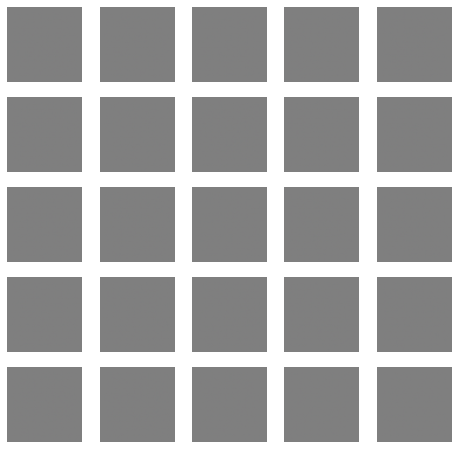

INFO:tensorflow:Assets written to: generator_0/assets


INFO:tensorflow:Assets written to: discriminator_0/assets


INFO:tensorflow:Assets written to: discriminator_0/assets


KeyboardInterrupt: ignored

In [10]:
# Instanciranje GAN klase i treniranje modela

gan=GAN()
gan.train(epochs=1500, batch_size=256, metrics_update=200, save_images=300, save_model=1500)